In [2]:
import pickle
DATA_PATH = 's2v_array_zhs_500dim.pickle'
file = open(DATA_PATH, 'rb')
sv_dict_array = pickle.load(file)
file.close()

In [3]:
sv_dict_array.shape

(102, 500)

In [4]:
import numpy as np
# TRAIN AND TEST DATA
DATA_NUM = 102
TEST_NUM = 30
SAMPLE_NUM = 15

test_x = sv_dict_array[:SAMPLE_NUM]
test_x = np.concatenate((test_x, sv_dict_array[-SAMPLE_NUM:]))
test_y = np.zeros(TEST_NUM)
test_y[SAMPLE_NUM:] = 1
train_x = sv_dict_array[SAMPLE_NUM:DATA_NUM-SAMPLE_NUM]
train_y = np.zeros(DATA_NUM-TEST_NUM)
train_y[51-SAMPLE_NUM:] = 1

print("Test size: {}".format(test_x.shape))
print("Train size: {}".format(train_x.shape))

Test size: (30, 500)
Train size: (72, 500)


In [5]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Reshape, MaxPooling2D, InputLayer
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout

In [6]:
with open('../pickle/sentence_dict.pickle', 'rb') as f:
    sentence_dict = pickle.load(f)


In [8]:
model = Sequential()
model.add(Dense(input_dim=500, units=128, activation='relu'))
model.add(Dense(input_dim=128, units=64, activation='relu'))
model.add(Dense(input_dim=64, units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
from tensorflow.python.keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_split=0.1, epochs=300, batch_size=8, verbose=2)

Train on 64 samples, validate on 8 samples
Epoch 1/300
 - 16s - loss: 0.6919 - acc: 0.6094 - val_loss: 0.6923 - val_acc: 0.6250
Epoch 2/300
 - 0s - loss: 0.6846 - acc: 0.9062 - val_loss: 0.6860 - val_acc: 0.7500
Epoch 3/300
 - 0s - loss: 0.6735 - acc: 0.8906 - val_loss: 0.6556 - val_acc: 1.0000
Epoch 4/300
 - 0s - loss: 0.6546 - acc: 0.8594 - val_loss: 0.6359 - val_acc: 1.0000
Epoch 5/300
 - 0s - loss: 0.6193 - acc: 0.9531 - val_loss: 0.5701 - val_acc: 1.0000
Epoch 6/300
 - 0s - loss: 0.5684 - acc: 0.9219 - val_loss: 0.5163 - val_acc: 1.0000
Epoch 7/300
 - 0s - loss: 0.4994 - acc: 0.9844 - val_loss: 0.4244 - val_acc: 1.0000
Epoch 8/300
 - 0s - loss: 0.4186 - acc: 0.9531 - val_loss: 0.3885 - val_acc: 1.0000
Epoch 9/300
 - 0s - loss: 0.3313 - acc: 0.9844 - val_loss: 0.2039 - val_acc: 1.0000
Epoch 10/300
 - 0s - loss: 0.2472 - acc: 0.9688 - val_loss: 0.2266 - val_acc: 1.0000
Epoch 11/300
 - 0s - loss: 0.1715 - acc: 0.9844 - val_loss: 0.2065 - val_acc: 1.0000
Epoch 12/300
 - 0s - loss: 0.1

 - 0s - loss: 2.7872e-04 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 96/300
 - 0s - loss: 2.7216e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 97/300
 - 0s - loss: 2.6681e-04 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 98/300
 - 0s - loss: 2.5969e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 99/300
 - 0s - loss: 2.5426e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 100/300
 - 0s - loss: 2.4895e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 101/300
 - 0s - loss: 2.4380e-04 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 102/300
 - 0s - loss: 2.4038e-04 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 103/300
 - 0s - loss: 2.3520e-04 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 104/300
 - 0s - loss: 2.2938e-04 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 105/300
 - 0s - loss: 2.2350e-04 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 106/300
 - 0s - loss: 

Epoch 187/300
 - 0s - loss: 5.3478e-05 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 188/300
 - 0s - loss: 5.2916e-05 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 189/300
 - 0s - loss: 5.1474e-05 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 190/300
 - 0s - loss: 5.0065e-05 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 191/300
 - 0s - loss: 4.8858e-05 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 192/300
 - 0s - loss: 4.7829e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 193/300
 - 0s - loss: 4.6791e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 194/300
 - 0s - loss: 4.5767e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 195/300
 - 0s - loss: 4.4669e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 196/300
 - 0s - loss: 4.3732e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 197/300
 - 0s - loss: 4.2790e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 198/

Epoch 275/300
 - 0s - loss: 1.1495e-05 - acc: 1.0000 - val_loss: 3.7238e-04 - val_acc: 1.0000
Epoch 276/300
 - 0s - loss: 1.1340e-05 - acc: 1.0000 - val_loss: 3.7010e-04 - val_acc: 1.0000
Epoch 277/300
 - 0s - loss: 1.1209e-05 - acc: 1.0000 - val_loss: 3.6884e-04 - val_acc: 1.0000
Epoch 278/300
 - 0s - loss: 1.1070e-05 - acc: 1.0000 - val_loss: 3.6690e-04 - val_acc: 1.0000
Epoch 279/300
 - 0s - loss: 1.0951e-05 - acc: 1.0000 - val_loss: 3.6136e-04 - val_acc: 1.0000
Epoch 280/300
 - 0s - loss: 1.0820e-05 - acc: 1.0000 - val_loss: 3.6244e-04 - val_acc: 1.0000
Epoch 281/300
 - 0s - loss: 1.0699e-05 - acc: 1.0000 - val_loss: 3.6165e-04 - val_acc: 1.0000
Epoch 282/300
 - 0s - loss: 1.0580e-05 - acc: 1.0000 - val_loss: 3.5456e-04 - val_acc: 1.0000
Epoch 283/300
 - 0s - loss: 1.0462e-05 - acc: 1.0000 - val_loss: 3.4476e-04 - val_acc: 1.0000
Epoch 284/300
 - 0s - loss: 1.0361e-05 - acc: 1.0000 - val_loss: 3.5000e-04 - val_acc: 1.0000
Epoch 285/300
 - 0s - loss: 1.0220e-05 - acc: 1.0000 - val_l

In [10]:
import matplotlib.pyplot as plt

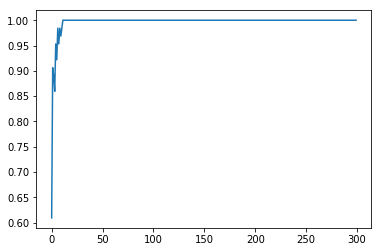

In [11]:
plt.plot(history.history['acc'])
plt.show()

In [12]:
result = model.predict(test_x)
result_cls = np.round(result).flatten()

In [13]:
print(result_cls[:15])
print(result_cls[-15:])

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
